<a href="https://colab.research.google.com/github/Harinirajkumar/eda_demo/blob/main/Maternal_Mortality_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import ensemble, tree, linear_model
from xgboost import XGBClassifier

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/content/Maternal_Mortality_Risk_Prediction.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


**UNIVARIATE STATS**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
df['RiskLevel'] = df['RiskLevel'].replace({'low risk':1, 'mid risk': 2, 'high risk': 3})
df['RiskLevel']= df['RiskLevel'].astype('int')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3
1,35,140,90,13.0,98.0,70,3
2,29,90,70,8.0,100.0,80,3
3,30,140,85,7.0,98.0,70,3
4,35,120,60,6.1,98.0,76,1


In [ ]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [ ]:
df.nunique()

Age            50
SystolicBP     19
DiastolicBP    16
BS             29
BodyTemp        8
HeartRate      16
RiskLevel       3
dtype: int64

In [ ]:
df.RiskLevel.value_counts()

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

<Axes: >

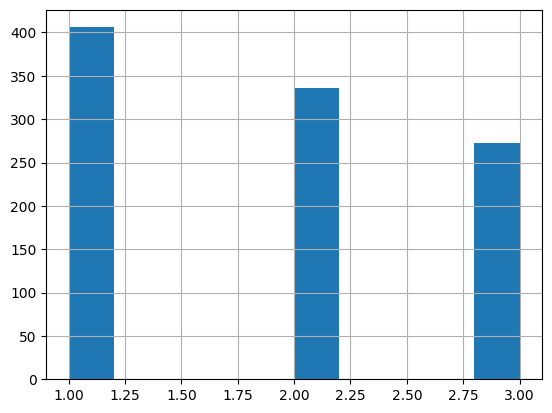

In [ ]:
df.RiskLevel.hist()

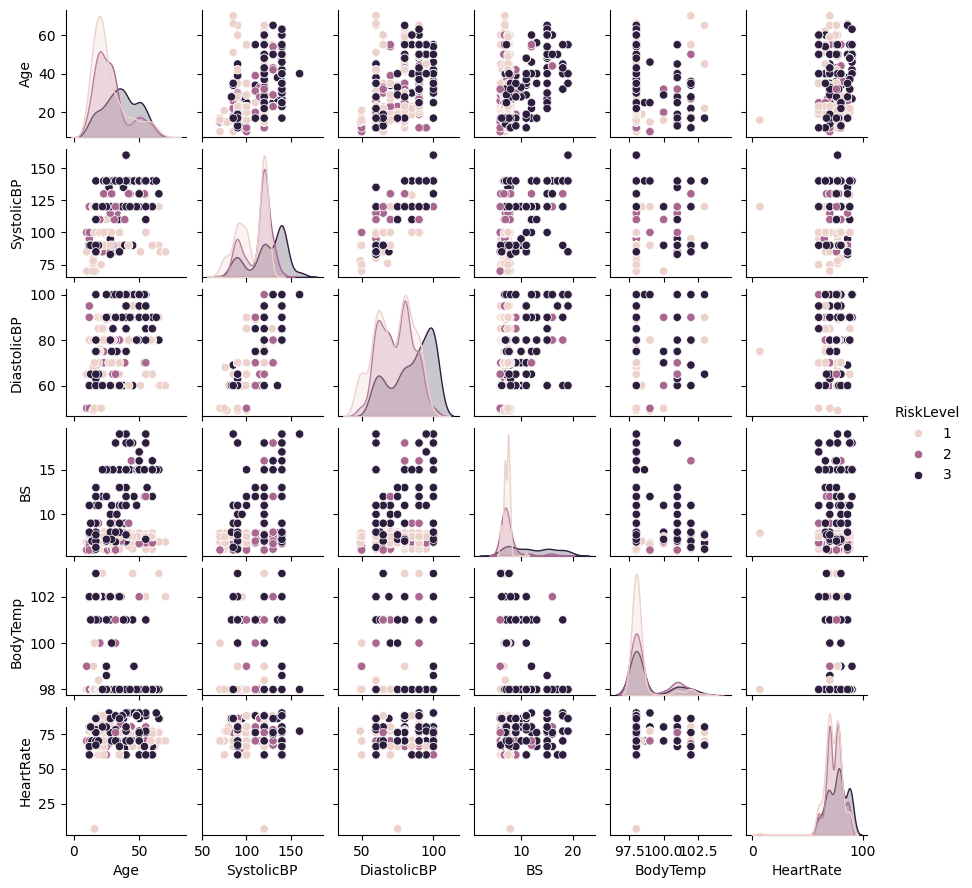

In [ ]:
sns.pairplot(df,height=1.5,hue='RiskLevel')

<Axes: >

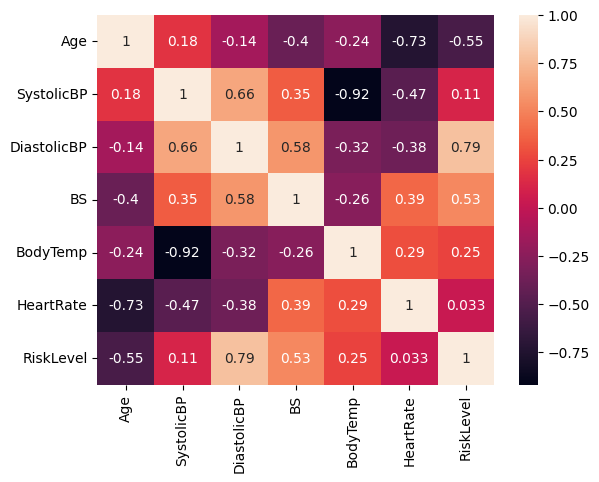

In [ ]:
sns.heatmap(df[:5].corr(method ='pearson'), annot=True)

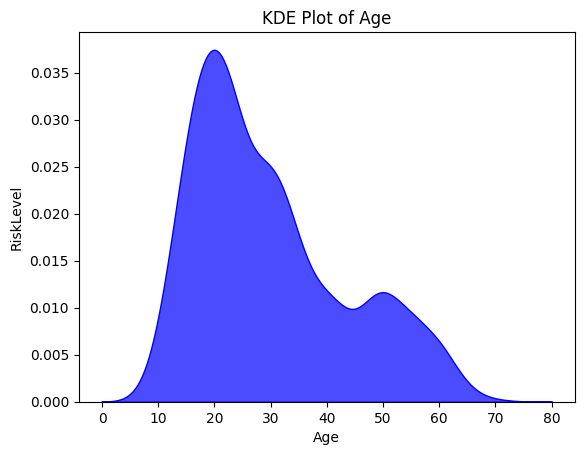

In [ ]:
sns.kdeplot(df.Age, fill=True, color='blue', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('RiskLevel')
plt.title('KDE Plot of Age')
plt.show()

**BIVARIATE STATS**

In [ ]:
df.corr()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798,0.267225
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108,0.396473
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151,0.346649
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867,0.569942
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771,0.163984
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000,0.194312
RiskLevel,0.267225,0.396473,0.346649,0.569942,0.163984,0.194312,1.000000


In [ ]:
df.corr().RiskLevel

Age            0.267225
SystolicBP     0.396473
DiastolicBP    0.346649
BS             0.569942
BodyTemp       0.163984
HeartRate      0.194312
RiskLevel      1.000000
Name: RiskLevel, dtype: float64

In [ ]:
r, p = stats.pearsonr(df.BS, df.BodyTemp)

In [ ]:
r, p

(-0.10349336335222328, 0.0009655461528975556)

In [ ]:
df.RiskLevel.describe()

count    1014.000000
mean        1.867850
std         0.807353
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: RiskLevel, dtype: float64

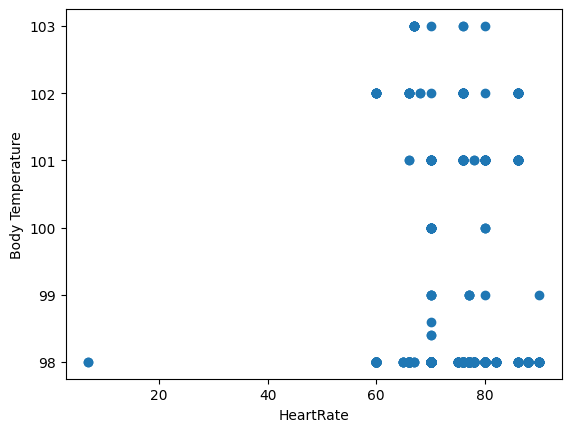

In [ ]:
plt.scatter(df.HeartRate, df.BodyTemp)
plt.xlabel('HeartRate')
plt.ylabel('Body Temperature')
plt.show()

In [ ]:
df_highrisk = df[df['RiskLevel']== 3]
df_midrisk = df[df['RiskLevel']== 2]
df_lowrisk = df[df['RiskLevel']== 1]

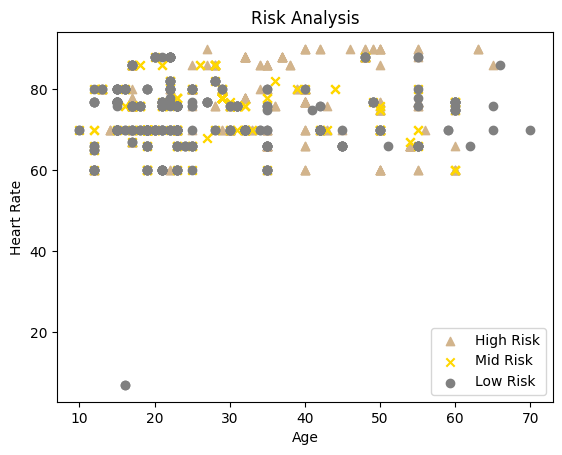

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df_highrisk['Age'], df_highrisk['HeartRate'], marker='^', color='tan', label='High Risk')
plt.scatter(df_midrisk['Age'], df_midrisk['HeartRate'], marker='x', color='gold', label='Mid Risk')
plt.scatter(df_lowrisk['Age'], df_lowrisk['HeartRate'], marker='o', color='grey', label='Low Risk')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.title('Risk Analysis')
plt.show()

In [ ]:
data = df[['SystolicBP','DiastolicBP']].value_counts().reset_index()
data.rename(columns={data.columns[2]:'count'}, inplace=True)
data.head()

,SystolicBP,DiastolicBP,count
0,120,80,204
1,120,90,112
2,90,60,67
3,140,100,63
4,90,65,53


In [ ]:
X = df.drop(['RiskLevel', 'Group'], axis=1)
y = df.RiskLevel
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=SEED)
X_train.shape, X_test.shape

((811, 6), (203, 6))

In [ ]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [ ]:
MLA = [
    #Ensemble Methods
    ensemble.GradientBoostingClassifier(random_state=SEED),
    ensemble.RandomForestClassifier(random_state=SEED),

    #GLM
    linear_model.SGDClassifier(random_state=SEED),
    linear_model.LogisticRegression(random_state=SEED),

    #Trees
    tree.DecisionTreeClassifier(random_state=SEED),
    tree.ExtraTreeClassifier(random_state=SEED),
]

In [ ]:
MLA_compare = pd.DataFrame()

#Function for MLA append to dataframe
def MLA_testing(MLA, X_train, X_test):
    row_index = 0
    for classifier in MLA:
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test_scaled)
        classifier_accuracy_score = accuracy_score(y_test, y_pred)
        kfold_accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
        MLA_name = classifier.__class__.__name__
        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Accuracy Score'] = classifier_accuracy_score*100
        MLA_compare.loc[row_index, 'K-Fold Accuracy'] = kfold_accuracy.mean()*100
        row_index+=1

In [ ]:
MLA_testing(MLA=MLA, X_train=X_train_scaled, X_test=X_test)
MLA_compare = MLA_compare.sort_values(by="Accuracy Score", ascending=False).reset_index(drop=True)
MLA_compare

,MLA Name,Accuracy Score,K-Fold Accuracy
0,RandomForestClassifier,87.192118,82.494731
1,DecisionTreeClassifier,86.699507,82.121349
2,ExtraTreeClassifier,83.251232,80.271003
3,GradientBoostingClassifier,80.295567,78.297200
4,LogisticRegression,60.098522,63.250527
5,SGDClassifier,57.142857,59.302921


In [ ]:
MLA = [
    #Ensemble Methods
    ('Random Forest',ensemble.RandomForestClassifier(random_state=SEED)),
    #Trees
    ('Decision Tree',tree.DecisionTreeClassifier(random_state=SEED)),
    ('Extra Tree',tree.ExtraTreeClassifier(random_state=SEED)),
]
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=MLA)
vc.fit(X_train, y_train)
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f} %'.format(accuracy*100))

Voting Classifier: 87.685 %


In [ ]:
y_pred = vc.predict(X_test)

In [ ]:
y_pred

array([1, 2, 1, 2, 3, 3, 2, 3, 3, 1, 1, 2, 3, 2, 1, 3, 3, 2, 1, 1, 3, 1,
       1, 1, 3, 3, 3, 2, 2, 2, 1, 1, 2, 1, 3, 1, 2, 3, 3, 1, 3, 1, 2, 2,
       2, 1, 2, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 2, 2, 3, 1,
       1, 3, 1, 3, 1, 2, 1, 2, 3, 2, 2, 1, 1, 2, 3, 2, 2, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 2, 2, 3, 2, 2, 1, 1, 2, 2, 1, 3, 2, 1, 1, 2, 2,
       3, 2, 3, 1, 1, 3, 2, 1, 3, 2, 1, 1, 3, 1, 3, 2, 3, 3, 2, 2, 1, 1,
       2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 1, 3, 3, 2, 2, 1, 3, 2, 3, 2, 3,
       1, 2, 2, 3, 1, 2, 2, 1, 2, 3, 1, 1, 3, 1, 2, 2, 1, 1, 2, 3, 3, 2,
       1, 3, 3, 3, 2, 3, 1, 3, 3, 1, 3, 1, 2, 1, 1, 3, 2, 3, 3, 3, 1, 3,
       1, 2, 3, 3, 3])

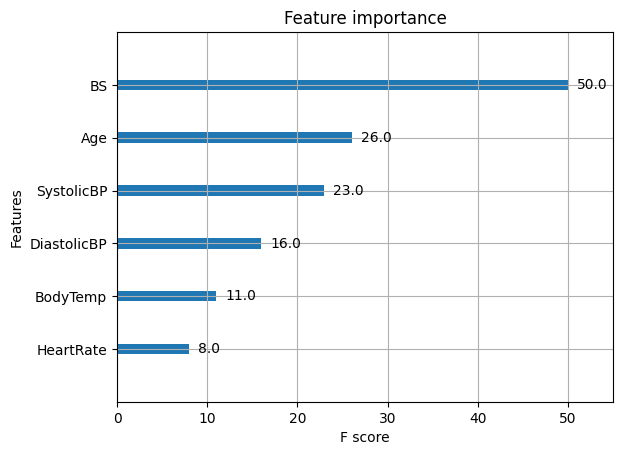

In [ ]:
import xgboost as xgb
maternal_dmatrix = xgb.DMatrix(data = X, label = y)
params = {'eval_metric':"mlogloss"}
xg_reg = xgb.train(dtrain=maternal_dmatrix,params=params,num_boost_round=5)
xgb.plot_importance(xg_reg)
plt.show()